# Домашнее задание по обработке текстов

## Предсказание цены акции по экономическим новостям

Входные данные:
* Новости о компании "Газпром", начиная с 2010 года
* Стоимость акций компании "Газпром" на ММВБ, начиная с 2010 года
    * цена открытия (Open)
    * цена закрытия (ClosingPrice)
    * максимальная цена за день (DailyHigh)
    * минимальная цена за день (DailyLow) 
    * объем бумаг (VolumePcs)


In [1]:
import numpy as np
import re

In [2]:
import pandas as pd
df = pd.read_csv('D:/Netology/ds2-fall-2017-master/5. NLP/5.4 Classification/Homework/texts.csv')
df.head()

,date,text
0,09.11.2017,Компания рассчитывает на решение по газовому с...
1,08.11.2017,"Как и предполагал “Ъ”, «Газпром», воспользова..."
2,01.11.2017,Новая редакция американских санкций ставит по...
3,30.10.2017,"Как стало известно “Ъ”, известный на рынке ри..."
4,23.10.2017,"НОВАТЭК, который через пять лет собирается за..."


In [3]:
pr_all = pd.read_csv('D:/Netology/ds2-fall-2017-master/5. NLP/5.4 Classification/Homework/gazprom_prices.csv', sep=';', decimal=',')
pr_all.head(5)

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,08.12.2017,133.43,132.60,133.90,132.00,16037970
1,07.12.2017,133.70,133.02,133.87,132.81,18198430
2,06.12.2017,133.33,134.00,134.29,132.91,14641730
3,05.12.2017,133.48,133.65,133.99,132.78,12684800
4,04.12.2017,133.01,133.77,134.00,131.93,17818980


### Часть 1. Вводная

Проведите предобработку текстов: если считаете нужным, выполните токенизацию, приведение к нижнему регистру, лемматизацию и/или стемминг. Ответьте на следующие вопросы:
* Есть ли корреляция между средней длинной текста за день и ценой закрытия?
* Есть ли корреляция между количеством упоминаний Алексея Миллера  и ценой закрытия? Учтите разные варианты написания имени.
* Упоминаний какого газопровода в статьях больше: 
    * "северный поток"
    * "турецкий поток"?
* О каких санкциях пишут в статьях?

In [7]:
pr_all.set_index('Date', inplace=True)

In [8]:
df['Length'] = len(df['text'])

In [ ]:
for i in range(1203):
    df['Length'][i] = len(df['text'][i])

c:\users\олег\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
days = df.groupby('date').mean()

In [10]:
df1 = days.merge(pr_all, how='inner', left_index=True, right_index=True)

1) Связь между средней длинной новостей и ценой закрытия

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [12]:
length = np.array(df1['Length']).reshape(-1,1)
close = np.array(df1['ClosingPrice']).reshape(-1,1)

In [14]:
lr.fit(length, close)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lr.score(length, close)

0.00020046013825159026

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
sns.jointplot(x='Length', y='ClosingPrice', data=df1, kind='scatter');

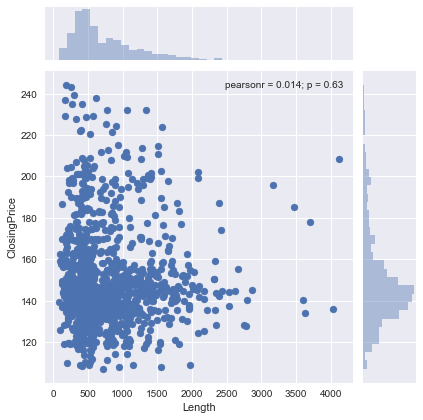

In [18]:
plt.show()

Исходя из очень маленького коэффициента R2 можно сделать вывод о том, что прямой связи между длинной текста за день и ценой закрытия нет. Визуально зависимость так же не заметна. Коэффициент корреляции Пирсона - 0.014.

2) Связь между количество упоминаний  Алексея Миллера и ценой закрытия

In [11]:
test = df.text[0]

In [48]:
%%time
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import sent_tokenize
from pymystem3 import Mystem


Wall time: 190 ms


In [5]:
m = Mystem()
lemmas2 = m.lemmatize(df.text[1])
print(''.join(lemmas2))

 как и предполагать “Ъ”, «газпром», воспользоваться жалоба иностранный партнер на налогообложение добычный проект в рф, смочь добиваться снижение налог на добыча полезный ископаемое (ндпи) для свой ачимовский залежи почти до уровень независимый производитель газ. этот льгота распространяться не только на сп «газпром» с OMV и Wintershall, но и на структура монополия, разрабатывать месторождение с запас от 1 трлн кубометр газ. по расчет “Ъ”, это приводить к то, что в 2018 год платеж по ндпи для «газпром» и его ачимовский сп снижаться на 2,8 млрд руб., из который 2,2 млрд руб. сэкономить сам монополия.



In [ ]:
lemmas = ''.join(m.lemmatize(df.text[0]))
miller = re.findall(r'миллер', lemmas)
alexmil = re.findall(r'алексей миллер', lemmas )
quant = len(miller) + len(alexmil)
total = [quant]

In [26]:
%%time
for i in range(1, len(df1)):
    lemmas = ''.join(m.lemmatize(df.text[i]))
    miller = re.findall(r'миллер', lemmas)
    alexmil = re.findall(r'алексей миллер', lemmas )
    quant = len(miller) + len(alexmil)
    total.append(quant)

Wall time: 46min 6s


In [36]:
millers = pd.DataFrame(total)
millers.columns = ['Miller']

In [47]:
closerp = pd.DataFrame(df1['ClosingPrice'])

In [49]:
closerp['id'] = list(range(len(df1)))

In [52]:
closerp.set_index('id', inplace=True)

In [56]:
millers = millers.merge(closerp, left_index=True, right_index=True)

In [58]:
millers.head()

,Miller,ClosingPrice
0,0,189.85
1,0,204.91
2,0,185.54
3,0,142.41
4,0,133.90


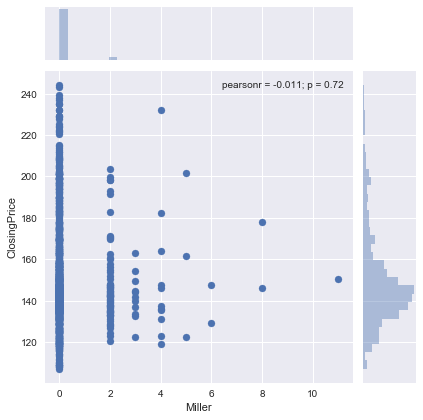

In [63]:
sns.jointplot(x='Miller', y='ClosingPrice', data=millers, kind='scatter')
plt.show(1)

Также, как и в предыдущем случае, сложно отследить корреляцию между количеством упоминаний Алексея Миллера и ценой закрытия. Коэффициент корреляции Пирсона незначительно отличается от 0. 

3) Упоминания газопроводов "северный поток" и "турецкий поток". 

In [79]:
lemmas = ''.join(m.lemmatize(df.text[4]))

In [81]:
test = '"северный поток"'

In [82]:
lemmas = ''.join(m.lemmatize(test))

In [84]:
north = re.findall(r'северный поток', lemmas)

In [20]:
n += 1

In [21]:
n

2

In [29]:
n = 0
t = 0

In [ ]:
len(df.text)

In [33]:
len(df)

1203

In [55]:
%%time
n = 0
t = 0

for i in range(len(df)):
    lemmas = ''.join(m.lemmatize(df.text[i]))
    north = re.findall(r'северный поток', lemmas)
    turk = re.findall(r'турецкий поток', lemmas)
    
    n += len(north)
    t += len(turk)
print('Количество упоминаний северного потока: {}'.format(n))
print('Количество упоминаний турецкого потока: {}'.format(t))

Количество упоминаний северного потока: 15
Количество упоминаний турецкого потока: 39
Wall time: 48min 40s


Количество упоминаний "Турецкого потока" заметно больше, чем "Северного потока"

## Часть 2. Классификационная
Вам предстоит решить следующую задачу: по текстам новостей за день определить, вырастет или понизится цена закрытия.
Для этого:
* бинаризуйте признак "цена закрытия":  новый признак ClosingPrice_bin равен 1, если по сравнению со вчера цена не упала, и 0 – в обратном случаея;
* составьте бучающее и тестовое множество: данные до начала 2016 года используются для обучения, данные с 2016 года и позже – для тестирования.

Таким образом, в каждлый момент времени мы знаем: 
* ClosingPrice_bin – бинарый целевой признак
* слова из статей, опубликованных в этот день – объясняющие признаки

В этой части задания вам нужно сделать baseline алгоритм и попытаться его улучшить в следующей части. 

Используйте любой известный вам алгоритм классификации текстов для того, Используйте $tf-idf$ преобразование, сингулярное разложение, нормировку признакого пространства и любые другие техники обработки данных, которые вы считаете нужным. Используйте accuracy и F-measure для оценки качества классификации. Покажите, как  $tf-idf$ преобразование или сингулярное разложение или любая другая использованная вами техника влияет на качество классификации.
Если у выбранного вами алгоритма есть гиперпараметры (например, $\alpha$ в преобразовании Лапласа для метода наивного Байеса), покажите, как изменение гиперпараметра влияет на качество классификации.

In [4]:
df1 = df.merge(pr_all, how='inner', left_index=True, right_index=True)

In [5]:
df1.shape

(1203, 8)

In [6]:
close = np.array(df1['ClosingPrice']).reshape(-1,1)

In [7]:
close

array([[ 132.6 ],
       [ 133.02],
       [ 134.  ],
       ..., 
       [ 137.62],
       [ 136.52],
       [ 138.1 ]])

In [8]:
ClosingPrice_bin = []
numobs = close.shape[0]
        
for i in range(numobs-1):
    if close[i+1][0] > close[i][0]:
        ClosingPrice_bin.append(1)
    else:
        ClosingPrice_bin.append(0)
ClosingPrice_bin = pd.DataFrame(ClosingPrice_bin, columns=['ClosingPrice_bin'])

In [9]:
ClosingPrice_bin.shape

(1202, 1)

In [10]:
df.shape

(1203, 2)

In [11]:
df.drop(df.index[-1:], inplace=True)

In [40]:
df.head()

,date,text
0,09.11.2017,Компания рассчитывает на решение по газовому с...
1,08.11.2017,"Как и предполагал “Ъ”, «Газпром», воспользова..."
2,01.11.2017,Новая редакция американских санкций ставит по...
3,30.10.2017,"Как стало известно “Ъ”, известный на рынке ри..."
4,23.10.2017,"НОВАТЭК, который через пять лет собирается за..."


In [28]:
import nltk

In [ ]:
prog = re.compile('[А-Яа-я\-]+')
tokens = prog.findall(text.lower())

In [115]:
df['text1'] = df.apply(lambda row: prog.findall(row['text'].lower()), axis=1)

In [42]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [120]:
tok1 = pd.Series(df['text1'][1])

In [117]:
alltokens = pd.Series(df['text1'][0])

In [121]:
fintoks = alltokens.append(tok1)
fintoks.shape

(145,)

In [124]:
print(len(alltokens))
print(len(tok1))

58
87


In [125]:
for i in range(1, len(df)):
    tok =  pd.Series(df['text1'][i])
    alltokens = alltokens.append(tok)

In [126]:
len(alltokens)

116269

In [127]:
tokens = list(alltokens)

In [91]:
len(tokens)

152301

In [100]:
text = '«Карты, деньги, два ствола» культовый фильм Гая Ричи. Эта картина покорила сначала Британию, затем Америку, а потом и весь мир. Никому неизвестный режиссер Гай Ричи, у которого за плечами были только коротметражка «Трудное дело», дешевые рекламные ролики и клипы, создал шедевр на все времена. Это именно тот случай, когда и критики, и зрители в восторге. Здесь очень много черного юмора и насилия, но это и делает фильм таким какой он есть. Хотя он и не стал лидером проката, он собрал множество наград и стал классикой. Но вернемся в прошлое и перенесемся за океан. В 1994 году вышел фильм «Криминальное чтиво» Квентина Тарантино. По слухам, как-то его спросили — «Квентин, вам не кажется, что вы не сняли ничего лучше Криминального чтива?», на что он ответил — «А кто снял?». Нет, не снял, но снимет через четыре года. Молодой и талантливый режиссер Гай Ричи заставит заговорить о себе весь мир. Со своей картиной «Карты, деньги, два ствола» он не только встанет на один уровень со своим голливудским коллегой Квентином Тарантино и его фильмом «Криминальное чтиво», но и превзойдет его. Впрочем, здесь достаточно трудно утверждать чей фильм лучше, а чей хуже: оба этих фильма гениальны, однако свое предпочтение я все же отдам Гаю Ричи. А теперь, после того, как я похвалила режиссера, можно перейти к самой картине. О ней только и можно сказать что она невероятна. Именно такой и видится криминальный мир Лондона. Здесь есть все составляющие для хорошего кино. Все актеры подобраны идеально и стоят на своем месте. Стоит ли говорить, что после этого фильма Джейсон Стэйтем проснулся звездой. Кроме потрясающей режиссерской работы, здесь ещё и отличный сценарий, написанный так же Гаем Ричи. Все диалоги настолько хороши, что во время просмотра хочется взять бумагу и ручку и записать их. Так же к диалогам подобрано отличное музыкальное сопровождение. С первых минут фильм кажется ничем не примечательным, и думаешь почему же все считают его культовым. Но потом происходит что-то нереальное. Этот фильм настолько притягивает к себе, что оторваться просто невозможно, настолько интересно наблюдать, как сюжетные линии переплетаются между собой. После просмотра «Карты, деньги, два ствола», просто сидишь в оцепенении и думаешь «Черт возьми, что это было? И хочу ещё!» Безусловно, Гай Ричи создал культовое кино, которое хочется смотреть и пересматривать.'

In [109]:
prog = re.compile('[А-Яа-я\-]+')
tokens = prog.findall(text.lower())

In [106]:
type(tokens)

list

In [102]:
d1 = nltk.FreqDist(tokens) # частотный словарь для текста
d1.most_common(10) # токен и кол-во его появлений в тексте

[('и', 22),
 ('что', 7),
 ('ричи', 6),
 ('не', 6),
 ('фильм', 6),
 ('все', 6),
 ('но', 5),
 ('он', 5),
 ('же', 4),
 ('а', 4)]

In [128]:
freq_dist = nltk.FreqDist(tokens)

In [131]:
rarenum = int(0.1 * len(tokens))

In [177]:
rarewords = [i[0] for i in freq_dist.most_common() if i[1] < 5]

In [179]:
len(rarewords)

12700

In [174]:
freq_dist.most_common()

[('в', 5510),
 ('на', 3126),
 ('газпром', 2552),
 ('и', 2436),
 ('по', 1600),
 ('с', 1455),
 ('не', 1033),
 ('газа', 961),
 ('млрд', 906),
 ('что', 824),
 ('-', 792),
 ('компании', 703),
 ('за', 664),
 ('для', 610),
 ('о', 604),
 ('руб', 596),
 ('до', 595),
 ('газпрома', 556),
 ('но', 555),
 ('к', 497),
 ('г', 496),
 ('из', 486),
 ('может', 458),
 ('нефть', 449),
 ('от', 402),
 ('компания', 400),
 ('как', 384),
 ('млн', 373),
 ('нефти', 357),
 ('а', 336),
 ('будет', 332),
 ('года', 329),
 ('газ', 327),
 ('сообщил', 309),
 ('ъ', 299),
 ('у', 283),
 ('уже', 267),
 ('этом', 263),
 ('это', 258),
 ('оао', 256),
 ('он', 256),
 ('его', 255),
 ('россии', 245),
 ('об', 227),
 ('говорится', 210),
 ('году', 208),
 ('газпромбанк', 202),
 ('при', 201),
 ('российского', 195),
 ('сказал', 192),
 ('украины', 186),
 ('газпром-медиа', 179),
 ('кубометров', 179),
 ('более', 176),
 ('монополии', 175),
 ('поставок', 172),
 ('также', 171),
 ('из-за', 161),
 ('со', 160),
 ('поставки', 160),
 ('который', 159)

In [148]:
print(nltk.__version__)

3.2.1


In [30]:
df.reset_index(inplace=True)

In [95]:
test = df['text'][0]

In [96]:
%%time
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from pymystem3 import Mystem


Wall time: 0 ns


In [97]:
prog = re.compile('[А-Яа-я\-]+')
tokens2 = prog.findall(test)

morph = MorphAnalyzer()
l2 = [morph.parse(token)[0].normal_form for token in tokens2 if not token in stopwords.words('russian')]

print(*l2)

компания рассчитывать решение газовый спор украина конец декабрь газпром ожидать решение стокгольмский арбитраж транзитный спор украинский нафтогаз поздний февраль год хотя ранний компания прогнозировать это произойти ноябрь решение взаимный иск условие поставка газа украина мнение монополия суд принять месяц ранний декабрь год


In [185]:
df['textnorm'] = 0

In [188]:
for i in range(len(df)):
    tokens2 = prog.findall(df['text'][i])

    morph = MorphAnalyzer()
    l2 = [morph.parse(token)[0].normal_form for token in tokens2 if not token in stopwords.words('russian')]
    toknorm = [word for word in l2 if not word in rarewords]
    df['textnorm'][i] = toknorm

In [189]:
df.head()

,date,text,tokenized_sents,text1,textnorm
0,09.11.2017,Компания рассчитывает на решение по газовому с...,"[Компания, рассчитывает, на, решение, по, газо...","[компания, рассчитывает, на, решение, по, газо...","[компания, решение, газовый, спор, украина, ко..."
1,08.11.2017,"Как и предполагал “Ъ”, «Газпром», воспользова...","[Как, и, предполагал, “Ъ”, ,, «Газпром», ,, во...","[как, и, предполагал, ъ, газпром, воспользовав...","[как, предполагать, ъ, газпром, воспользоватьс..."
2,01.11.2017,Новая редакция американских санкций ставит по...,"[Новая, редакция, американских, санкций, стави...","[новая, редакция, американских, санкций, стави...","[новый, санкция, ставить, угроза, нефтяной, пр..."
3,30.10.2017,"Как стало известно “Ъ”, известный на рынке ри...","[Как, стало, известно, “Ъ”, ,, известный, на, ...","[как, стало, известно, ъ, известный, на, рынке...","[как, стать, известно, ъ, рынок, вадим, работа..."
4,23.10.2017,"НОВАТЭК, который через пять лет собирается за...","[НОВАТЭК, ,, который, через, пять, лет, собира...","[новатэк, который, через, пять, лет, собираетс...","[новатэк, который, пять, год, собираться, запу..."


In [190]:
toktest = df['textnorm'][0]

In [191]:
sertest = pd.DataFrame(pd.Series(toktest).str.lower().value_counts()).T

In [192]:
sertest

,решение,спор,украина,компания,год,ранний,арбитраж,ожидать,месяц,это,...,нафтогаз,суд,хотя,газа,прогнозировать,конец,взаимный,стокгольмский,условие,газовый
0,3,2,2,2,2,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [193]:
test2 = df['textnorm'][1]

In [194]:
sertest2 = pd.DataFrame(pd.Series(test2).str.lower().value_counts()).T

In [195]:
sertest2

,газпром,ачимовский,миллиард,ъ,газа,ндпить,монополия,сп,это,который,...,производитель,свой,проект,тот,разрабатывать,предполагать,добыча,триллион,структура,запас
0,3,2,2,2,2,2,2,2,1,1,...,1,1,1,1,1,1,1,1,1,1


In [196]:
sertest.append(sertest2)

,арбитраж,ачимовский,взаимный,воспользоваться,газа,газовый,газпром,год,добиться,добыча,...,тот,триллион,украина,украинский,уровень,условие,хотя,ъ,это,этот
0,1.0,NaN,1.0,NaN,1,1.0,1,2,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,1.0,1.0,NaN,1,NaN
0,NaN,2.0,NaN,1.0,2,NaN,3,1,1.0,1.0,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,1,1.0


In [198]:
final = sertest
for i in range(1, len(df)):
    
    text = df['textnorm'][i]
    try:
        dftext = pd.DataFrame(pd.Series(text).str.lower().value_counts()).T
    except:
        print('Troubles with text : {}'.format(i))
    final = final.append(dftext)
    final.fillna(0, inplace=True)

In [199]:
final.head()

,-,-го,-е,-клиент,-компания,-метровый,-процентный,-разработчик,-технология,-х,...,янк,янкевич,янукович,янша,японец,яров,ярославский,ясный,яценюк,яцинявичен-балтадоун
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
final.shape

(1202, 4435)

In [202]:
final.to_csv('D:/Netology/GazpromDf.csv')

In [18]:
data = pd.read_csv('D:/Netology/GazpromDf.csv', encoding='cp1251')

In [22]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [26]:
classdata = data.merge(pr_all, 'inner', left_index=True, right_index=True)

In [58]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [70]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [34]:
price = np.array(ClosingPrice_bin['ClosingPrice_bin'])

In [36]:
price.shape

(1202,)

In [37]:
data.shape

(1202, 4435)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data, price, test_size = 0.1)

In [42]:
lr = LogisticRegression()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=1000)

In [66]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
predicted = lr.predict(X_test)

In [71]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = f1_score(predicted, y_test, average = 'micro')
micro_r = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = f1_score(predicted, y_test, average = 'macro')
macro_r = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))


acc=0.5207
micro F1=0.5207, micro P=0.5207, micro R=0.5207
macro F1=0.5198, macro P=0.5198, macro R=0.5198



In [72]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [73]:
predicted = svc.predict(X_test)

In [74]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = f1_score(predicted, y_test, average = 'micro')
micro_r = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = f1_score(predicted, y_test, average = 'macro')
macro_r = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))


acc=0.5372
micro F1=0.5372, micro P=0.5372, micro R=0.5372
macro F1=0.5333, macro P=0.5333, macro R=0.5333



In [75]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
predicted = rfc.predict(X_test)

In [77]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = f1_score(predicted, y_test, average = 'micro')
micro_r = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = f1_score(predicted, y_test, average = 'macro')
macro_r = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))


acc=0.5124
micro F1=0.5124, micro P=0.5124, micro R=0.5124
macro F1=0.4924, macro P=0.4924, macro R=0.4924



In [78]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=500)

In [82]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [88]:
data2 = pca.fit_transform(data)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data2, price, test_size = 0.1)

In [90]:
lr = LogisticRegression()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=1000)

In [91]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
predicted = lr.predict(X_test)

In [93]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = f1_score(predicted, y_test, average = 'micro')
micro_r = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = f1_score(predicted, y_test, average = 'macro')
macro_r = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))


acc=0.4711
micro F1=0.4711, micro P=0.4711, micro R=0.4711
macro F1=0.4702, macro P=0.4702, macro R=0.4702



In [94]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [95]:
predicted = svc.predict(X_test)

In [96]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = f1_score(predicted, y_test, average = 'micro')
micro_r = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = f1_score(predicted, y_test, average = 'macro')
macro_r = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))


acc=0.4545
micro F1=0.4545, micro P=0.4545, micro R=0.4545
macro F1=0.4515, macro P=0.4515, macro R=0.4515



In [97]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
predicted = rfc.predict(X_test)

In [99]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = f1_score(predicted, y_test, average = 'micro')
micro_r = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = f1_score(predicted, y_test, average = 'macro')
macro_r = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))


acc=0.4793
micro F1=0.4793, micro P=0.4793, micro R=0.4793
macro F1=0.4758, macro P=0.4758, macro R=0.4758



In [100]:
from sklearn.feature_extraction.text import TfidfTransformer

In [101]:
tfidf = TfidfTransformer()

In [104]:
tfidf.fit(data)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [107]:
data3 = data

In [110]:
data3 = tfidf.fit_transform(data3)

In [112]:
data3

<1202x4435 sparse matrix of type '<class 'numpy.float64'>'
	with 52187 stored elements in Compressed Sparse Row format>

In [113]:
X_train, X_test, y_train, y_test = train_test_split(data3, price, test_size = 0.1)

In [114]:
lr = LogisticRegression()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=1000)

In [115]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
predicted = lr.predict(X_test)

In [117]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = f1_score(predicted, y_test, average = 'micro')
micro_r = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = f1_score(predicted, y_test, average = 'macro')
macro_r = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))


acc=0.5124
micro F1=0.5124, micro P=0.5124, micro R=0.5124
macro F1=0.5058, macro P=0.5058, macro R=0.5058



In [118]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [119]:
predicted = svc.predict(X_test)

In [120]:
acc = accuracy_score(predicted, y_test)
micro_f1 = f1_score(predicted, y_test, average = 'micro')
micro_p = f1_score(predicted, y_test, average = 'micro')
micro_r = f1_score(predicted, y_test, average = 'micro')
macro_f1 = f1_score(predicted, y_test, average = 'macro')
macro_p = f1_score(predicted, y_test, average = 'macro')
macro_r = f1_score(predicted, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))


acc=0.4876
micro F1=0.4876, micro P=0.4876, micro R=0.4876
macro F1=0.4859, macro P=0.4859, macro R=0.4859

